In [46]:
#calculo do indice exg

import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show


#função para normalizar os dados
def normalize(array):
    array_norm = array/255
    return array_norm

#calculo a coordenada cromatica
def calculo_exg():
    
    band1, band2, band3, profile = cbers_raster(raster)
    #normalizando as bandas
    r =  normalize(band3)
    g = normalize (band2)
    b = normalize(band1)
   #calculo coordenadas cromaticas
    rc = r/(r+g+b)
    gc = g/(r+g+b)
    bc = b/(r+g+b)
    exg = (2*g)-r-b
    return exg, profile

#abro o raster e separo as bandas

def cbers_raster(raster):
    
    with rasterio.open(raster, 'r') as dst:
        band1 = dst.read(1)
        band2 = dst.read(2)
        band3 = dst.read(3)
        profile =  dst.profile
    
    return band1, band2, band3, profile

#ploto o calculo exg na band G
def plot_cbers():
    exg, profile = calculo_exg()
    #criando matriz de zeros
    zero = np.zeros((profile['height'],profile['width']))
    #plotando o exg calculado
    plt.figure(figsize=(20,20))
    show([zero,exg,zero], transform = profile['transform'], title="Índice ExG")
    #exportando raster
    with rasterio.open('exg_calc.tif','w', driver = 'Gtiff', dtype = rasterio.float32, height = 1943, width = 1929, count = 1, crs= '+proj=utm +zone=21 +south +datum=WGS84 +units=m +no_defs', transform = (8.0, 0.0, 734856.0,
       0.0, -8.0, 7189156.0) ) as dst:
        dst.write(exg,1) 
    return



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


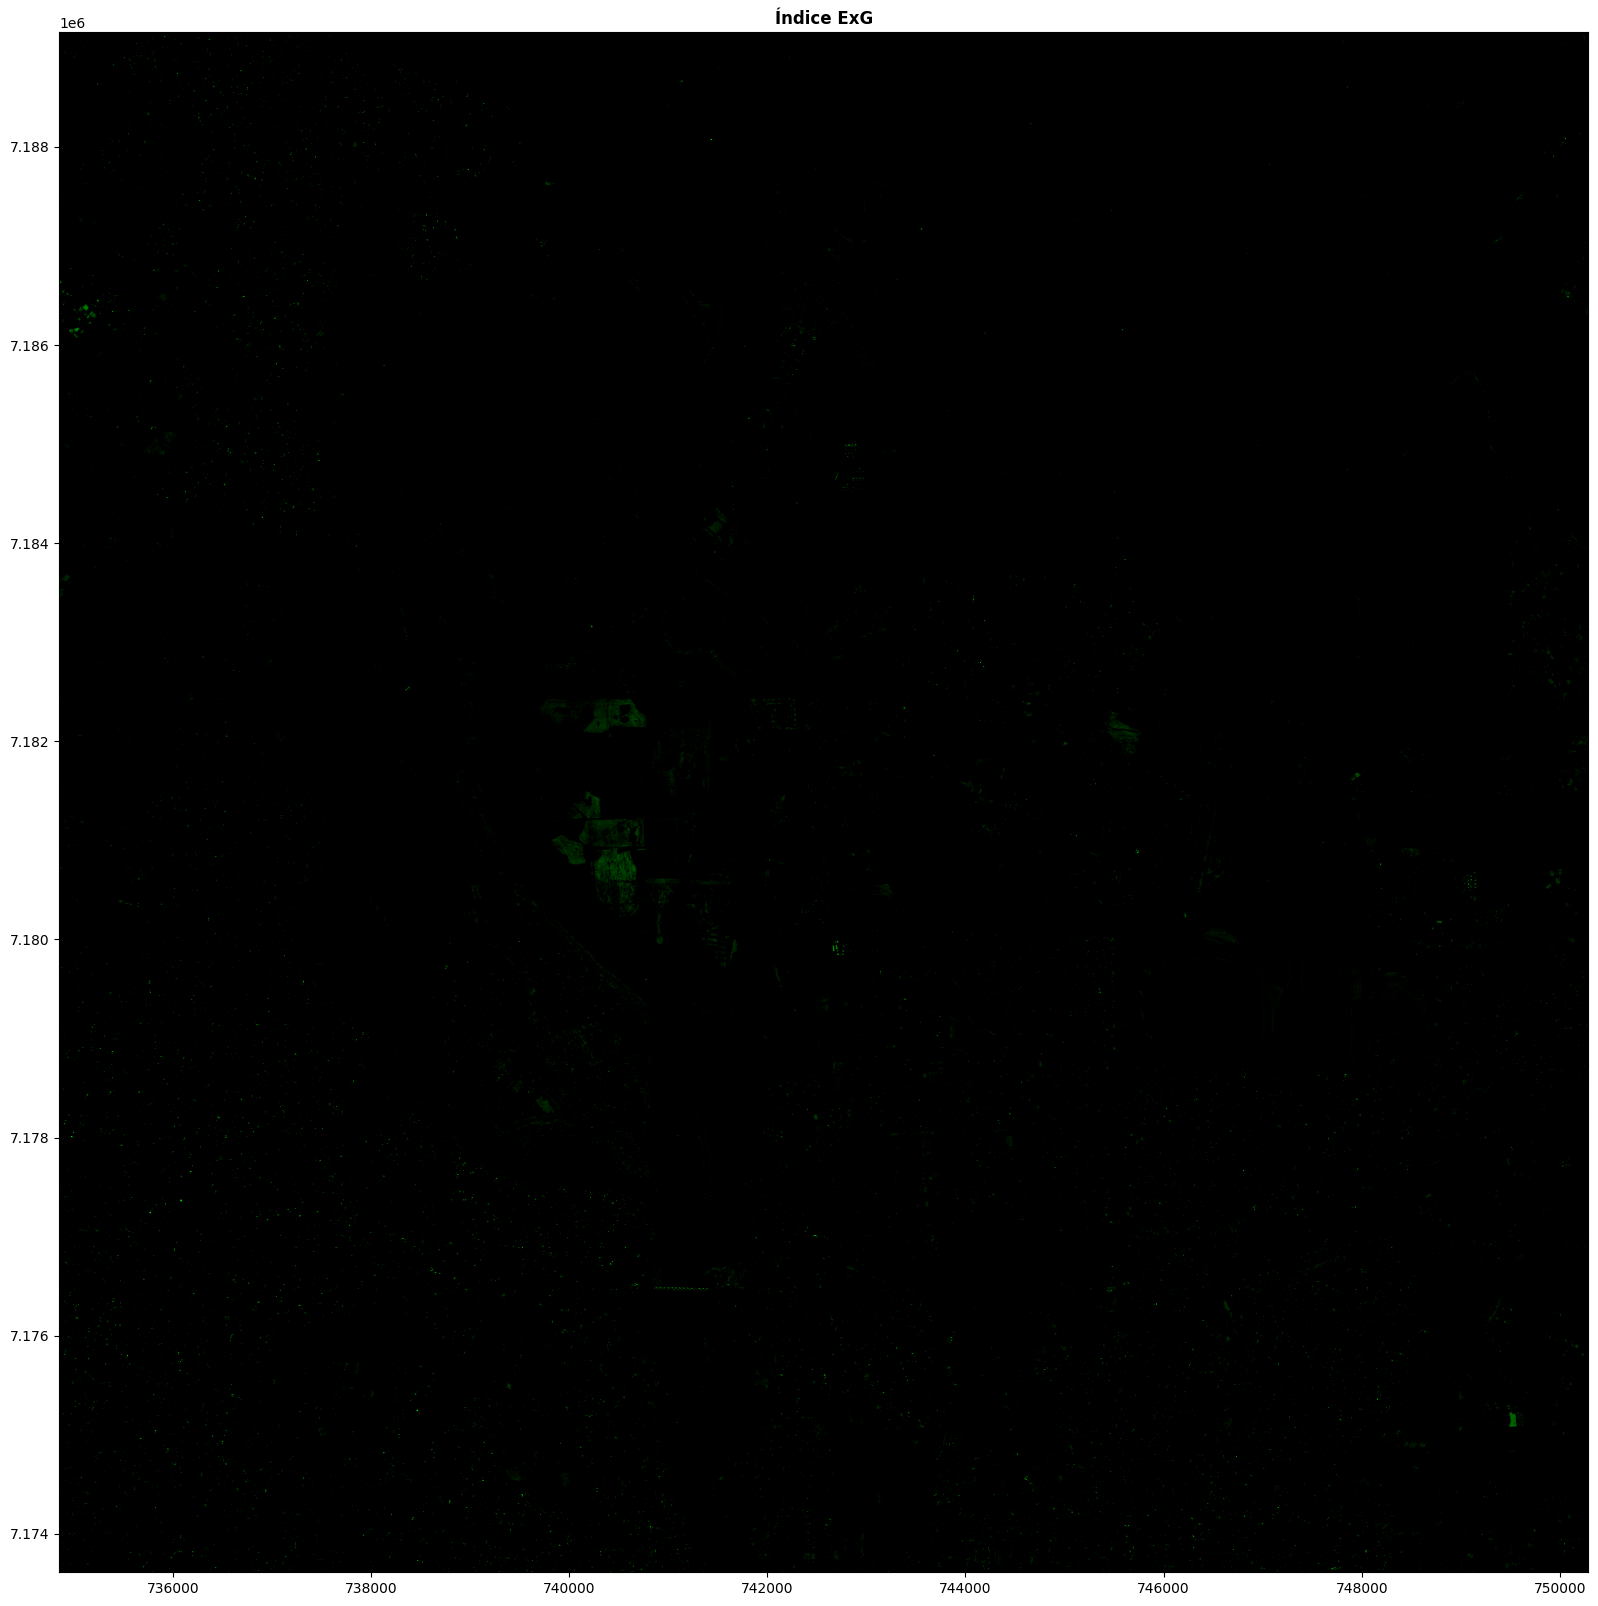

In [47]:
raster = 'cbers.tif'
plot_cbers()